Loading packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve

## EDA

In [2]:
attrition = pd.read_csv('HR_attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The target variable should be column `Attrition`

We also observe a mix of numerical and categorical data types. For the categorical columns, we will need to transform them using numerical encoding. 

The EDA section will only have a quick look at the basic exploration, and check data completeness.

**Data quality checks**

In [3]:
attrition.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

The dataset is very clean in terms of missing values.

**Distribution of the dataset**

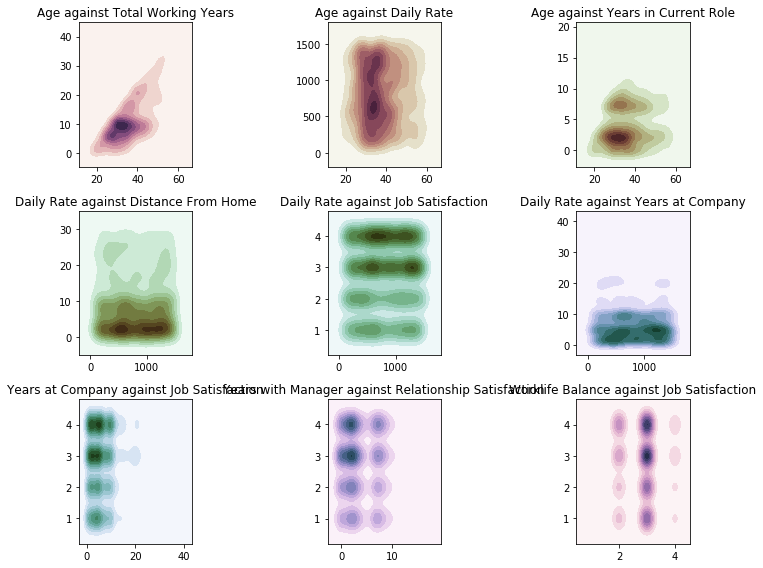

In [4]:
f, axes = plt.subplots(3,3, figsize = (10,8),
                     sharex=False, sharey=False)
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start = s[0], light = 1, as_cmap = True)

x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,0])
axes[0,0].set(title='Age against Total Working Years')

cmap = sns.cubehelix_palette(start = s[1], light = 1, as_cmap = True)
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set(title='Age against Daily Rate')

cmap = sns.cubehelix_palette(start = s[2], light = 1, as_cmap = True)
x = attrition['Age'].values
y = attrition['YearsInCurrentRole'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set(title='Age against Years in Current Role')

cmap = sns.cubehelix_palette(start = s[3], light = 1, as_cmap = True)
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set(title='Daily Rate against Distance From Home')

cmap = sns.cubehelix_palette(start = s[4], light = 1, as_cmap = True)
x = attrition['DailyRate'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set(title='Daily Rate against Job Satisfaction')

cmap = sns.cubehelix_palette(start = s[6], light = 1, as_cmap = True)
x = attrition['DailyRate'].values
y = attrition['YearsAtCompany'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,2])
axes[1,2].set(title='Daily Rate against Years at Company')

cmap = sns.cubehelix_palette(start = s[5], light = 1, as_cmap = True)
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,0])
axes[2,0].set(title='Years at Company against Job Satisfaction')

cmap = sns.cubehelix_palette(start = s[7], light = 1, as_cmap = True)
y = attrition['RelationshipSatisfaction'].values
x = attrition['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,1])
axes[2,1].set(title='Years with Manager against Relationship Satisfaction')

cmap = sns.cubehelix_palette(start = s[8], light = 1, as_cmap = True)
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,2])
axes[2,2].set(title='Worklife Balance against Job Satisfaction')

f.tight_layout()

**Correlation of Features**

In [5]:
numeric = list(attrition.dtypes == 'int64')
numeric_columns = attrition.columns[numeric]
attrition_num = attrition[numeric_columns]
attrition_num.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Column `EmployeeCount` and `StandardHours` have novariation, so we drop them.

In [6]:
attrition_num = attrition_num.drop(['EmployeeCount', 'StandardHours'], 1)

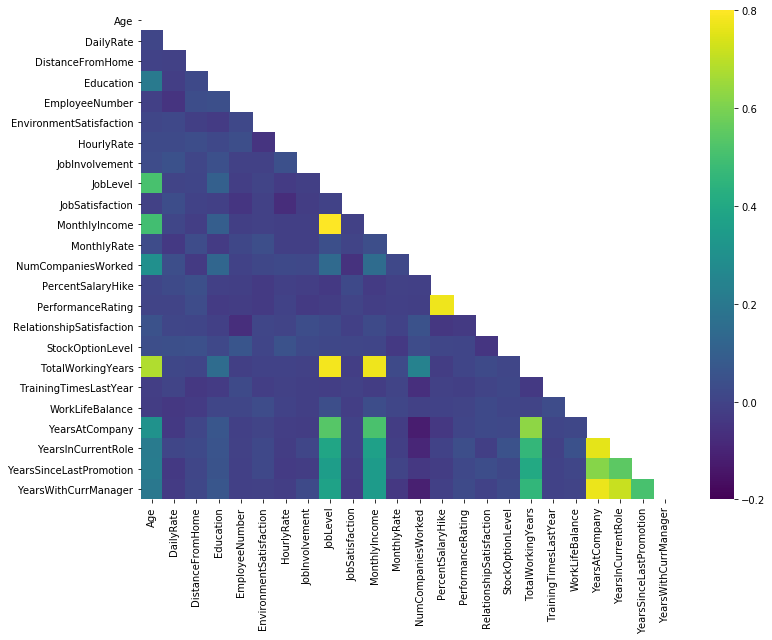

In [7]:
corrMatrix = attrition_num.corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)]=True

plt.subplots(figsize=(12, 9))
sns.heatmap(corrMatrix, mask = mask,cmap='viridis', vmax=0.8, vmin=-0.2)

From the correlation plots, we can see that many of the columns seemed to be poorly correlated with one another. It would be preferable for training the model using variables that are not inter-correlated.

**Pairplot**

In [8]:
target_map = {'Yes':1, 'No':0}
attrition['Attrition_numerical'] = attrition['Attrition'].apply(lambda x:target_map[x])

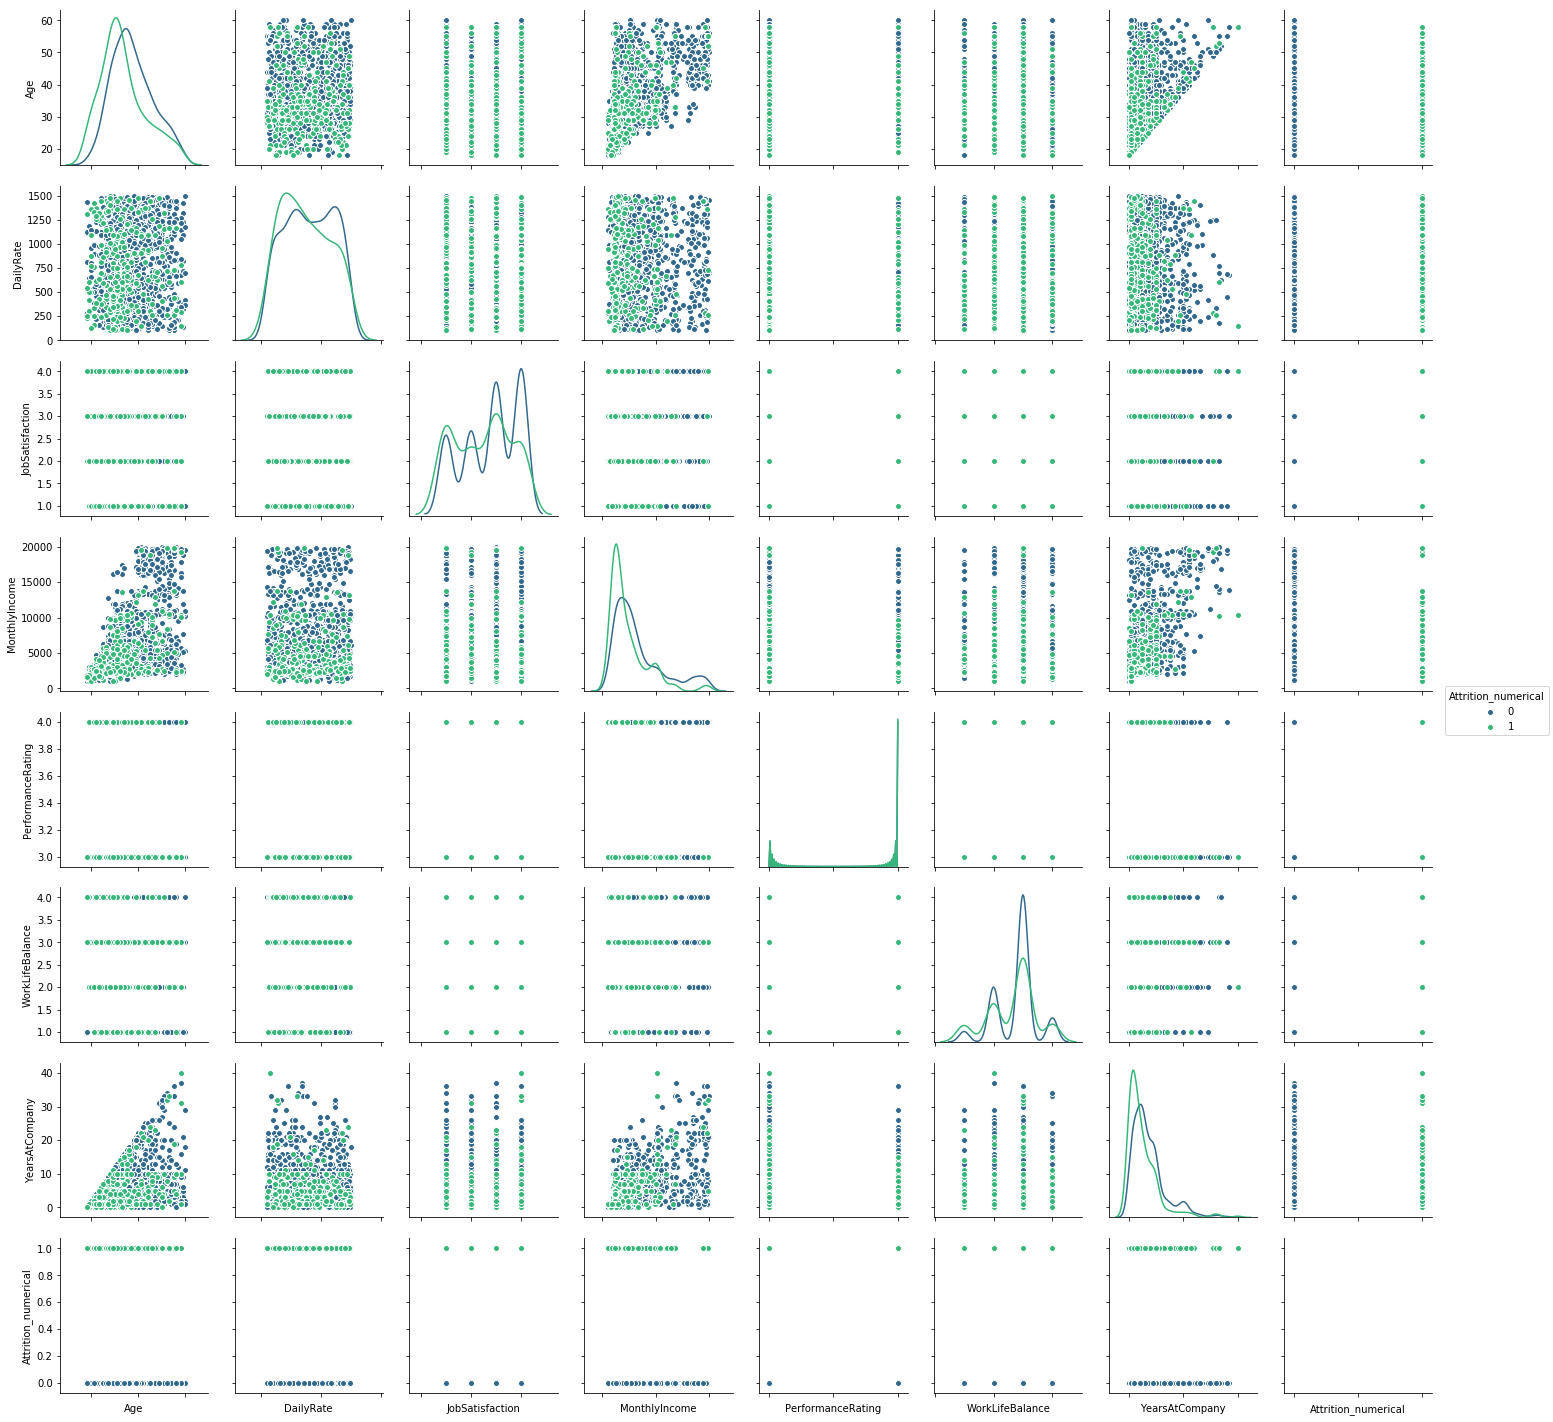

In [9]:
target_cols = ['Age', 'DailyRate', 'JobSatisfaction', 
               'MonthlyIncome', 'PerformanceRating','WorkLifeBalance',
               'YearsAtCompany','Attrition_numerical']
g = sns.pairplot(attrition[target_cols], hue='Attrition_numerical', palette='viridis', diag_kind='kde')
g.set(xticklabels=[])

## Simple Feature Engineering & Categorical Encoding

We create a categorical variable indicate whether the employee had only been employeed by the current employer or not.

In [10]:
attrition['OnlyEmployer'] = attrition['TotalWorkingYears'] == attrition['YearsAtCompany']
attrition['OnlyEmployer'].describe()

count      1470
unique        2
top       False
freq        996
Name: OnlyEmployer, dtype: object

In [11]:
attrition_cat = attrition.drop(numeric_columns, axis=1).drop(['Attrition','Attrition_numerical'], axis=1)
attrition_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,OnlyEmployer
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,False
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,True
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,False
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,True
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,False


In [12]:
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head()

,OnlyEmployer,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,False,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,1
1,True,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
2,False,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,True,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
4,False,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


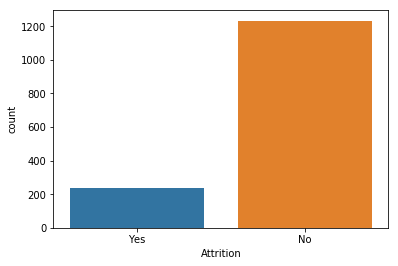

In [13]:
sns.countplot(x='Attrition', data=attrition)

This is quite a big imbalance in our target variable.

## Model Implementation

### Train/Test Split

In [14]:
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
target = attrition['Attrition'].apply(lambda x:target_map[x])

In [1]:
from sklearn.model_selection import train_test_split
train, test, target_train, target_val = train_test_split(attrition_final, target, random_state=42, train_size=0.75)

# from sklearn.cross_validation import StratifiedShuffleSplit
# train, test, target_train, target_val = StratifiedShuffleSplit(attrition_final, target, random_state=42)
# # cannot use in such a small dataset (only 1470 observations)

NameError: name 'attrition_final' is not defined

In [16]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=42)
smote_train, smote_target = oversampler.fit_sample(train, target_train)

In [18]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'r-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='best')
    plt.ylim([0,1])
    
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [43]:
scores = cross_val_predict(logit, smote_train, smote_target, cv=5, method='predict_proba')
scores = scores[:,1]
precisions, recalls, thresholds = precision_recall_curve(smote_target, scores)

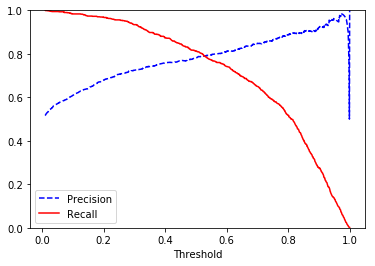

In [44]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

0.8789710269935661

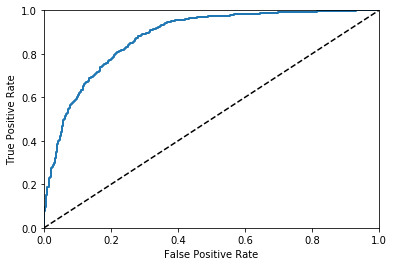

In [45]:
fpr, tpr, thresholds = roc_curve(smote_target, scores)
plot_roc_curve(fpr, tpr, thresholds)
roc_auc_score(smote_target, scores)

In [46]:
logit.fit(smote_train, smote_target)
predictions = logit.predict(test)
accuracy_score(target_val, predictions)

0.7690217391304348

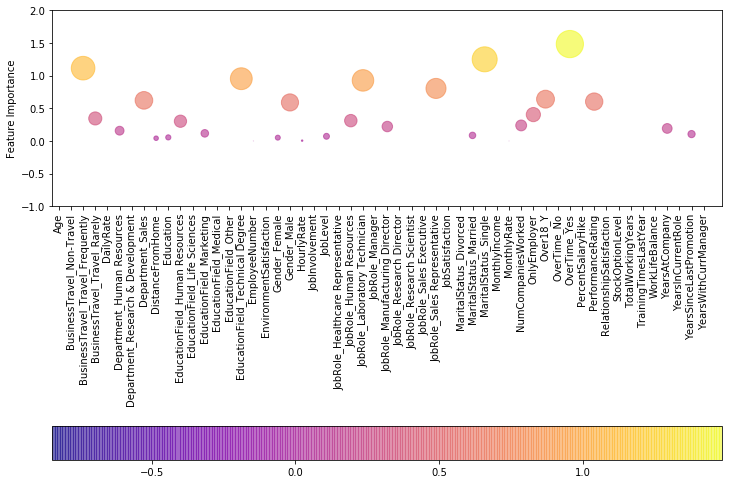

In [67]:
y = logit.coef_
x = attrition_final.columns.values
f, ax = plt.subplots(figsize=(12,9))
plt.scatter(x=x, y=y, c=y, s=y*500, alpha=.6, cmap='plasma')
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.ylim([-1,2])
plt.colorbar(orientation='horizontal', pad=0.45)

### Random Forest Classifier

In [17]:
seed = 42
rf_params = {
    'n_jobs':-1,
    'n_estimators':800,
    'warm_start':True,
    'max_features':0.3,
    'max_depth':9,
    'min_samples_leaf':2,
    'max_features':'sqrt',
    'random_state':seed,
    'verbose':0
}

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(**rf_params)

In [20]:
from sklearn.model_selection import cross_val_predict
scores = cross_val_predict(rf_clf, smote_train, smote_target, cv=5, method='predict_proba')
scores = scores[:,1]
precisions, recalls, thresholds = precision_recall_curve(smote_target, scores)

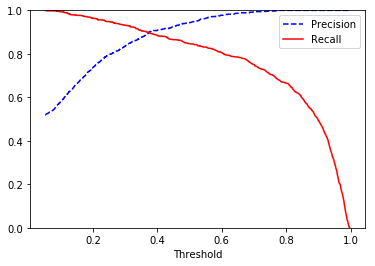

In [21]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

0.9607746929168433

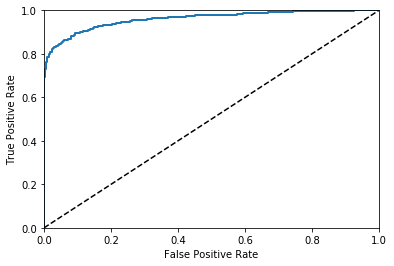

In [22]:
fpr, tpr, thresholds = roc_curve(smote_target, scores)
plot_roc_curve(fpr, tpr, thresholds)
roc_auc_score(smote_target, scores)

In [23]:
rf_clf.fit(smote_train, smote_target)
predictions = rf_clf.predict(test)
accuracy_score(target_val, predictions)

0.8722826086956522

In [24]:
y = rf_clf.feature_importances_
x = attrition_final.columns.values

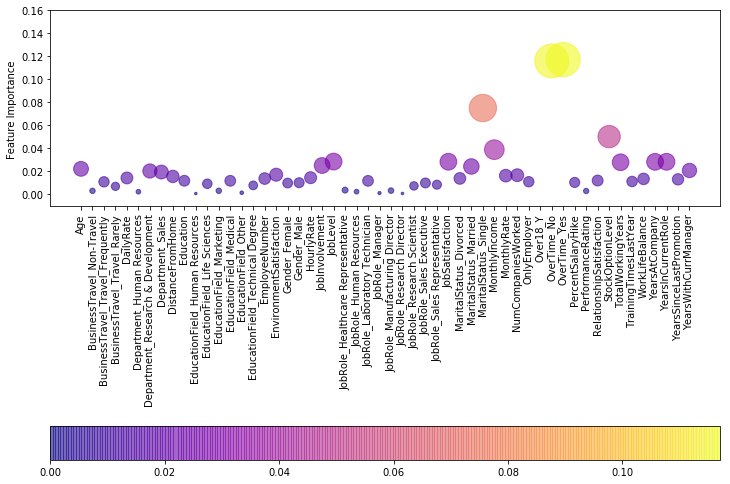

In [25]:
f, ax = plt.subplots(figsize=(12,9))
plt.scatter(x=x, y=y, c=y, s=y*10000, alpha=.6, cmap='plasma')
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.colorbar(orientation='horizontal', pad=0.45)

**Important Random Forest features**: Overtime, Martial Status

### Gradient Boosting Classifier

In [26]:
gb_params = {
     'n_estimators': 500,
    'max_features': 0.9,
    'learning_rate' : 0.2,
    'max_depth': 11,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(**gb_params)


In [28]:
scores = cross_val_predict(gb_clf, smote_train, smote_target, cv=5, method='predict_proba')
scores = scores[:,1]
precisions, recalls, thresholds = precision_recall_curve(smote_target, scores)

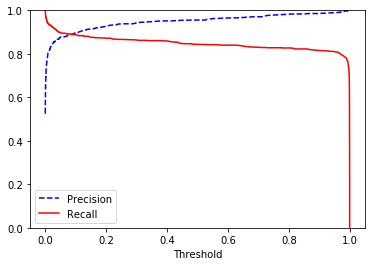

In [29]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

0.9600620944396924

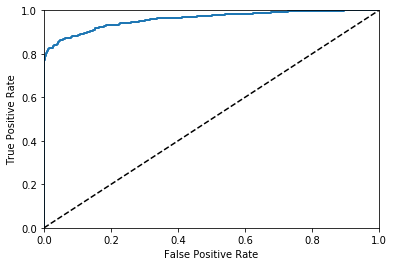

In [30]:
fpr, tpr, thresholds = roc_curve(smote_target, scores)
plot_roc_curve(fpr, tpr, thresholds)
roc_auc_score(smote_target, scores)

In [31]:
gb_clf.fit(smote_train, smote_target)
predictions = gb_clf.predict(test)
accuracy_score(target_val, predictions)

0.8695652173913043

In [32]:
y = gb_clf.feature_importances_
x = attrition_final.columns.values

(0, 0.01)

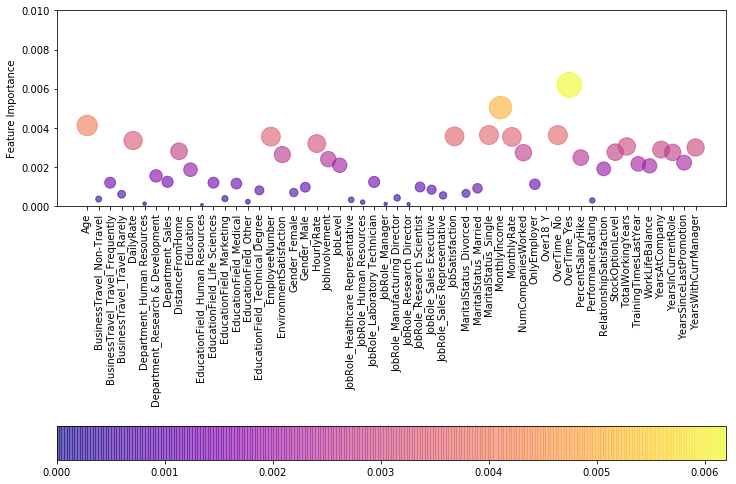

In [33]:
f, ax = plt.subplots(figsize=(12,9))
plt.scatter(x=x, y=y, c=y, s=y*100000, alpha=.6, cmap='plasma')
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.colorbar(orientation='horizontal', pad=0.45)
plt.ylim([0,0.01])

**Important Gradient Boosting Features**: Overtime, Monthly Income. Daily and Monthly Rate, Age

### XGBoost Classifier

In [34]:
import xgboost as xgb

In [35]:
xgb_clf = xgb.XGBClassifier(random_state=42)

In [36]:
scores = cross_val_predict(xgb_clf, smote_train, smote_target, cv=5, method='predict_proba')
scores = scores[:,1]
precisions, recalls, thresholds = precision_recall_curve(smote_target, scores)

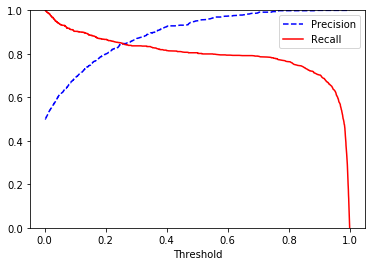

In [37]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

0.9152955544172108

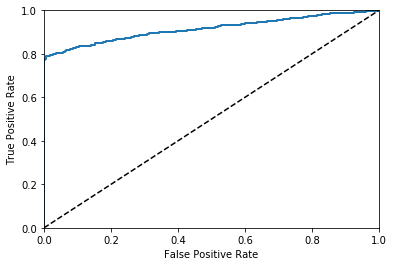

In [38]:
fpr, tpr, thresholds = roc_curve(smote_target, scores)
plot_roc_curve(fpr, tpr, thresholds)
roc_auc_score(smote_target, scores)

In [39]:
xgb_clf.fit(smote_train, smote_target)
predictions = xgb_clf.predict(test.as_matrix())
accuracy_score(target_val, predictions)

/Users/kristine/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.875

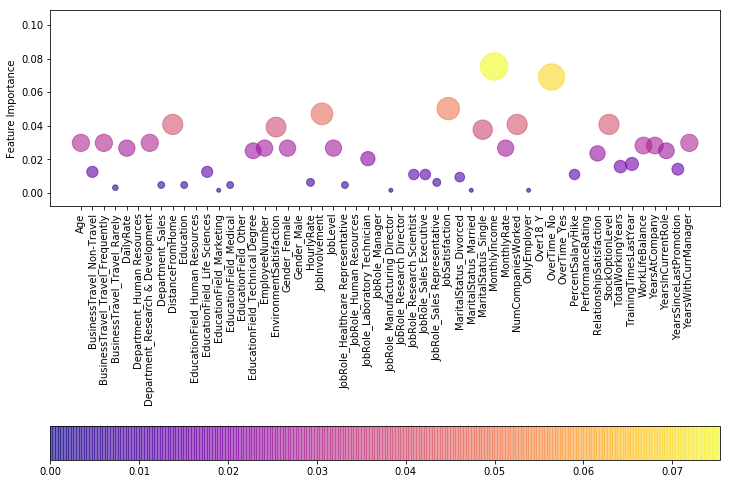

In [40]:
y = xgb_clf.feature_importances_
x = attrition_final.columns.values
f, ax = plt.subplots(figsize=(12,9))
plt.scatter(x=x, y=y, c=y, s=y*10000, alpha=.6, cmap='plasma')
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.colorbar(orientation='horizontal', pad=0.45)
# plt.ylim([0,0.01])

**Important XGBoost Features**: Overtime, Monthly Rate, Job Satisfaction